In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
print(nx.__version__)
#import sklearn as skl
import scipy.stats
import scipy.odr as odr

import os
import re
print(os.getcwd())
from pathlib import Path
import multiprocessing as mp

from utils.paths import get_info, get_subjects
from utils.graphs import delete_rois

2.8.4
C:\Users\Tomasz\OneDrive - Uniwersytet Jagielloński\Konfy\Brainhack 2022\Brainhack_connectomics\network_stats


In [2]:
import os
from subprocess import Popen, STDOUT, PIPE
import logging
import re

def check_path(path):
    """
    Check if specified path exist. Make directory in case it doesn't.
    """
    if not os.path.isdir(path):
        os.system("mkdir -p {}".format(path))
    return path

def get_subjects(data_path, session='*', subject_ID='*', format='.csv', exclude =''):
    """
    Get all the subjects specified in directory.
    """

    logging.info(" Target Dataset: " + data_path)
    output = Popen(f"find {data_path if len(data_path)>0 else '.'} ! -wholename '{exclude}' -wholename '*{session}/*{subject_ID}*{format}'", shell=True, stdout=PIPE)
    print(output)
    files= str(output.stdout.read()).removeprefix('b\'').removesuffix('\'').removesuffix('\\n').split('\\n')
    logging.info(" Found " + str(len(files)) + " subject(s)")
    return files

def get_info(f):
    """
    Get all the relevant info from the file.
    """
    
    f = f.removeprefix("\"").removeprefix("\'").removesuffix("\"").replace('./', '')
    path = f.removesuffix(f.split('/')[-1])
    name = (f.split('/')[-1]).split('.')[0] # just the file name (without extension)
    subject_ID = str(re.findall("sub-...[0-9]+", name)[0])
    session = str(re.findall("_ses-.+_", name)[0]) 
    return path, session, subject_ID, name

if __name__ == '__main__':
    pass

In [3]:
datadir_str = "../../Brainhack-Krakow (project 3 - network similarities)/Brain-Network-Structural-Topology/Data"
print(os.listdir(datadir_str))

['Atlas', 'Glioma', 'Stroke']


In [4]:
def getPATnum(fname):
    return int(re.search("sub-PAT([0-9]+)", fname)[1])

basedir_stroke_acute = Path(datadir_str, "Stroke/ses-acute")
basedir_stroke_followup = Path(datadir_str, "Stroke/ses-followup")
basedir_stroke_followup2 = Path(datadir_str, "Stroke/ses-followup-2")

fnames_stroke_acute = [
    "sub-PAT134_ses-acute_CM.csv",
    "sub-PAT145_ses-acute_CM.csv",
    "sub-PAT148_ses-acute_CM.csv",
    "sub-PAT151_ses-acute_CM.csv",
    "sub-PAT154_ses-acute_CM.csv",
    "sub-PAT155_ses-acute_CM.csv",
    "sub-PAT161_ses-acute_CM.csv",
    "sub-PAT162_ses-acute_CM.csv",
    "sub-PAT167_ses-acute_CM.csv",
    "sub-PAT168_ses-acute_CM.csv",
    "sub-PAT175_ses-acute_CM.csv",
    "sub-PAT177_ses-acute_CM.csv",
    "sub-PAT187_ses-acute_CM.csv",
    "sub-PAT190_ses-acute_CM.csv",
    "sub-PAT191_ses-acute_CM.csv",
    "sub-PAT194_ses-acute_CM.csv",
    "sub-PAT196_ses-acute_CM.csv"
]

fnames_stroke_followup = [
    "sub-PAT100_ses-followup_CM.csv",
    "sub-PAT107_ses-followup_CM.csv",
    "sub-PAT109_ses-followup_CM.csv",
    "sub-PAT116_ses-followup_CM.csv",
    "sub-PAT124_ses-followup_CM.csv",
    "sub-PAT134_ses-followup_CM.csv",
    "sub-PAT145_ses-followup_CM.csv",
    "sub-PAT148_ses-followup_CM.csv",
    "sub-PAT151_ses-followup_CM.csv",
    "sub-PAT155_ses-followup_CM.csv",
    "sub-PAT161_ses-followup_CM.csv",
    "sub-PAT162_ses-followup_CM.csv",
    "sub-PAT167_ses-followup_CM.csv",
    "sub-PAT168_ses-followup_CM.csv",
    "sub-PAT175_ses-followup_CM.csv",
    "sub-PAT177_ses-followup_CM.csv",
    "sub-PAT187_ses-followup_CM.csv",
    "sub-PAT190_ses-followup_CM.csv",
    "sub-PAT196_ses-followup_CM.csv",
    "sub-PAT51_ses-followup_CM.csv",
    "sub-PAT52_ses-followup_CM.csv",
    "sub-PAT72_ses-followup_CM.csv",
    "sub-PAT75_ses-followup_CM.csv",
    "sub-PAT78_ses-followup_CM.csv",
    "sub-PAT80_ses-followup_CM.csv",
    "sub-PAT84_ses-followup_CM.csv",
    "sub-PAT98_ses-followup_CM.csv",
    "sub-PAT99_ses-followup_CM.csv"
]

fnames_stroke_followup2 = [
    "sub-PAT100_ses-followup-2_CM.csv",
    "sub-PAT109_ses-followup-2_CM.csv",
    "sub-PAT124_ses-followup-2_CM.csv",
    "sub-PAT145_ses-followup-2_CM.csv",
    "sub-PAT148_ses-followup-2_CM.csv",
    "sub-PAT151_ses-followup-2_CM.csv",
    "sub-PAT155_ses-followup-2_CM.csv",
    "sub-PAT161_ses-followup-2_CM.csv",
    "sub-PAT162_ses-followup-2_CM.csv",
    "sub-PAT168_ses-followup-2_CM.csv",
    "sub-PAT175_ses-followup-2_CM.csv",
    "sub-PAT177_ses-followup-2_CM.csv",
    "sub-PAT187_ses-followup-2_CM.csv",
    "sub-PAT190_ses-followup-2_CM.csv",
    "sub-PAT35_ses-followup-2_CM.csv",
    "sub-PAT43_ses-followup-2_CM.csv",
    "sub-PAT44_ses-followup-2_CM.csv",
    "sub-PAT47_ses-followup-2_CM.csv",
    "sub-PAT51_ses-followup-2_CM.csv",
    "sub-PAT52_ses-followup-2_CM.csv",
    "sub-PAT62_ses-followup-2_CM.csv",
    "sub-PAT78_ses-followup-2_CM.csv",
    "sub-PAT81_ses-followup-2_CM.csv",
    "sub-PAT84_ses-followup-2_CM.csv",
    "sub-PAT87_ses-followup-2_CM.csv",
    "sub-PAT93_ses-followup-2_CM.csv"
]

fnames_all = [*fnames_stroke_acute, *fnames_stroke_followup, *fnames_stroke_followup2]
#print(fnames_all)
patNums_all = set(map(lambda fname: getPATnum(fname), fnames_all))
#subIDs_all_sorted = sorted(list(map(lambda pname: pname[:7] + "0" + pname[7:] if len(pname) == 9 else pname, subIDs_all)))
patNums_all_sorted = sorted(list(patNums_all))

mats_stroke_acute = dict()
mats_stroke_followup = dict()
mats_stroke_followup2 = dict()

patNums_stroke_acute = []
patNums_stroke_followup = []
patNums_stroke_followup2 = []

for patNum in patNums_all:
    #mats_stroke_acute[fname[4:9]] \
#     if Path(basedir_stroke_acute / fname).exists():
#         mats_stroke_acute[f]
#             np.loadtxt(basedir_stroke_acute / fname, delimiter=","))
    patStr = f"sub-PAT{patNum}"
    
    if patStr in " ".join(fnames_stroke_acute):
        fname = f"{patStr}_ses-acute_CM.csv"
        mats_stroke_acute[patNum] = np.loadtxt(basedir_stroke_acute / fname, delimiter=",")
        patNums_stroke_acute.append(patNum)
    
    if patStr in " ".join(fnames_stroke_followup):
        fname = f"{patStr}_ses-followup_CM.csv"
        mats_stroke_followup[patNum] = np.loadtxt(basedir_stroke_followup / fname, delimiter=",")
        patNums_stroke_followup.append(patNum)
        
    if patStr in " ".join(fnames_stroke_followup2):
        fname = f"{patStr}_ses-followup-2_CM.csv"
        mats_stroke_followup2[patNum] = np.loadtxt(basedir_stroke_followup2 / fname, delimiter=",")
        patNums_stroke_followup2.append(patNum)


display(mats_stroke_acute)

mats_stroke_acute, rois_deleted_stroke_acute = delete_rois(np.array([*mats_stroke_acute.values()]))
mats_stroke_followup, rois_deleted_stroke_followup = delete_rois(np.array([*mats_stroke_followup.values()]))
mats_stroke_followup2, rois_deleted_stroke_followup2 = delete_rois(np.array([*mats_stroke_followup2.values()]))
    
display(mats_stroke_acute.shape)

{134: array([[0.000e+00, 1.000e+00, 1.794e+03, ..., 0.000e+00, 2.000e+00,
         0.000e+00],
        [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
         1.000e+00],
        [1.794e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.400e+01,
         2.000e+00],
        [2.000e+00, 1.000e+00, 0.000e+00, ..., 1.400e+01, 0.000e+00,
         6.900e+01],
        [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 6.900e+01,
         0.000e+00]]),
 145: array([[0.00e+00, 4.10e+01, 1.27e+03, ..., 1.00e+00, 1.60e+01, 7.00e+00],
        [4.10e+01, 0.00e+00, 6.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [1.27e+03, 6.00e+00, 0.00e+00, ..., 1.00e+00, 1.60e+01, 1.00e+00],
        ...,
        [1.00e+00, 0.00e+00, 1.00e+00, ..., 0.00e+00, 2.10e+01, 4.10e+01],
        [1.60e+01, 0.00e+00, 1.60e+01, ..., 2.10e+01, 0.00e+00, 4.80e+01],
        [7.00e+00, 0.00e+00, 1.00e+00, ..., 4.1

(17, 166, 166)

## Averaged adjacency matrix graph

In [152]:
matavg_stroke_acute = np.mean(mats_stroke_acute, axis=0)
# display(matavg_stroke_acute)
matavg_stroke_acute_log1p = np.log1p(matavg_stroke_acute)

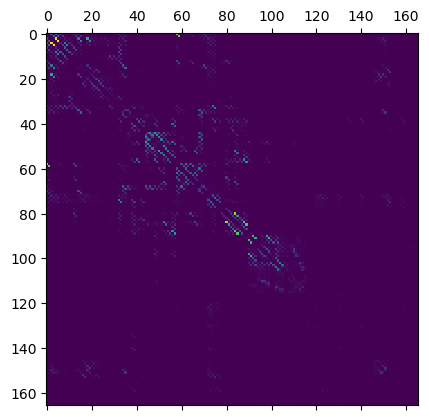

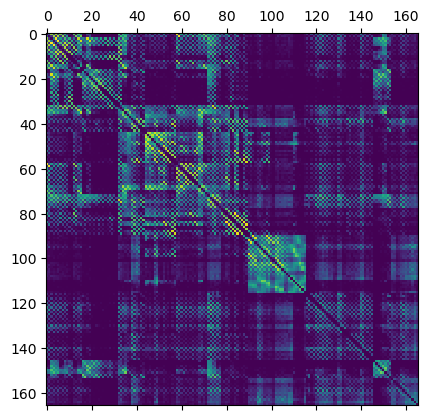

In [153]:
%matplotlib inline
plt.matshow(matavg_stroke_acute)
plt.matshow(np.log1p(matavg_stroke_acute))

In [154]:
Gavg = nx.from_numpy_matrix(matavg_stroke_acute)
Gavg.remove_edges_from(list(nx.selfloop_edges(Gavg)))

Gavg_log1p = nx.from_numpy_matrix(matavg_stroke_acute_log1p)

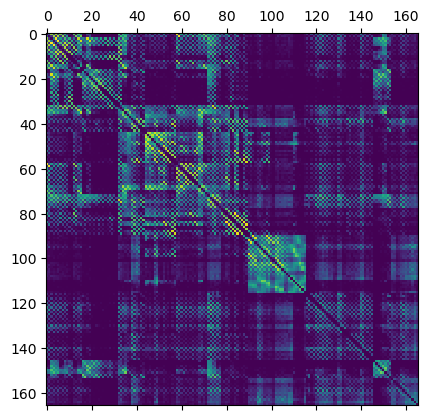

In [155]:
plt.matshow(np.log1p(nx.to_numpy_matrix(Gavg)))

In [118]:
Gavg_nodeStrengths = {nodeLabel: strength for (nodeLabel, strength) in Gavg.degree(weight="weight")}
Gavg_nodeStrengthHist = np.histogram(np.fromiter(Gavg_nodeStrengths.values(), dtype=float),
                                     bins=100)
Gavg_nodeStrengthHist

Gavg_log1p_nodeStrengths = {nodeLabel: strength for (nodeLabel, strength) in Gavg_log1p.degree(weight="weight")}
Gavg_log1p_nodeStrengthHist = np.histogram(np.fromiter(Gavg_log1p_nodeStrengths.values(), dtype=float),
                                     bins=100)
Gavg_log1p_nodeStrengthHist

print(Gavg_log1p_nodeStrengthHist[0].sum())

166


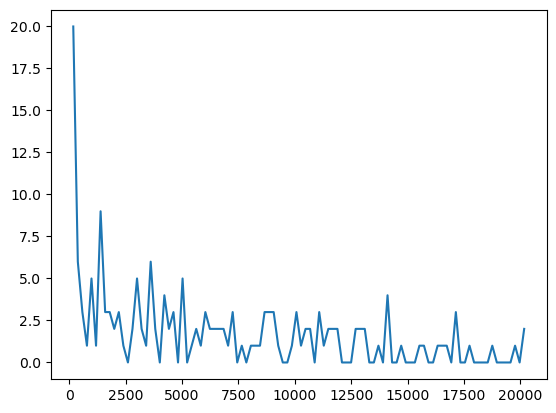

In [108]:
plt.plot(Gavg_nodeStrengthHist[1][:-1],
        Gavg_nodeStrengthHist[0])

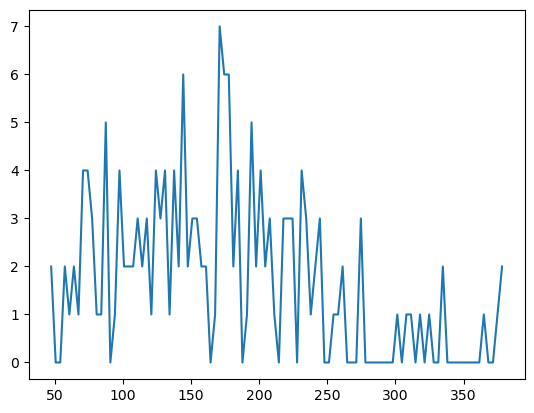

In [111]:
plt.plot(Gavg_log1p_nodeStrengthHist[1][:-1],
        Gavg_log1p_nodeStrengthHist[0])

Might be most sensible to do a strength calculation (or any other) on the joint distribution (combined datasets).

## Node-based statistics patient-wise

In [184]:
for patNum, adjMat in zip(patNums_stroke_acute, mats_stroke_acute):
    g = Gs_stroke_acute[patNum] = nx.from_numpy_matrix(adjMat)
    strengths_stroke_acute[patNum] = {node: strength for node, strength in g.degree(weight="weight")}
    strengths_stroke_acute[None].extend(strengths_stroke_acute[patNum].values())

for patNum, adjMat in zip(patNums_stroke_followup, mats_stroke_followup):
    g = Gs_stroke_followup[patNum] = nx.from_numpy_matrix(adjMat)
    strengths_stroke_followup[patNum] = {node: strength for node, strength in g.degree(weight="weight")}

for patNum, adjMat in zip(patNums_stroke_followup2, mats_stroke_followup2):
    g = Gs_stroke_followup2[patNum] = nx.from_numpy_matrix(adjMat)
    strengths_stroke_followup2[patNum] = {node: strength for node, strength in g.degree(weight="weight")}

## Joint node strength

In [5]:
Gs_stroke_acute = dict()
Gs_stroke_followup = dict()
Gs_stroke_followup2 = dict()

strengths_stroke_acute = dict()
strengths_stroke_acute[None] = []
strengths_stroke_followup = dict()
strengths_stroke_followup2 = dict()

def make_graphs(patNums, mats, log1p=False):
    graphs = dict()
    
    if log1p:
        transFunc = np.log1p
    else:
        transFunc = lambda x: x

    for patNum, adjMat in zip(patNums, mats):
        #print(patNum)
        graphs[patNum] = nx.from_numpy_matrix(transFunc(adjMat))
    
    return graphs


def strengths_joint(graphDict, normalize=False):
    strengths = []
    
    for patNum, g in graphDict.items():
        #print(g.degree)
        strengths.extend(map(lambda p: p[1], g.degree(weight="weight")))
    
    if normalize:
        normalizer = len(strength)
    else:
        normalizer = 1
    
    return np.array(strengths) / normalizer


Gs_stroke_acute = make_graphs(patNums_stroke_acute, mats_stroke_acute)
Gs_stroke_followup = make_graphs(patNums_stroke_followup, mats_stroke_followup)
Gs_stroke_followup2 = make_graphs(patNums_stroke_followup2, mats_stroke_followup2)

Gs_stroke_acute_log1p = make_graphs(patNums_stroke_acute, mats_stroke_acute, True)
Gs_stroke_followup_log1p = make_graphs(patNums_stroke_followup, mats_stroke_followup, True)
Gs_stroke_followup2_log1p = make_graphs(patNums_stroke_followup2, mats_stroke_followup2, True)

strengths_stroke_acute_joint = strengths_joint(Gs_stroke_acute)
strengths_stroke_followup_joint = strengths_joint(Gs_stroke_followup)
strengths_stroke_followup2_joint = strengths_joint(Gs_stroke_followup2)

strengths_stroke_acute_log1p_joint = strengths_joint(Gs_stroke_acute_log1p)
strengths_stroke_followup_log1p_joint = strengths_joint(Gs_stroke_followup_log1p)
strengths_stroke_followup2_log1p_joint = strengths_joint(Gs_stroke_followup2_log1p)

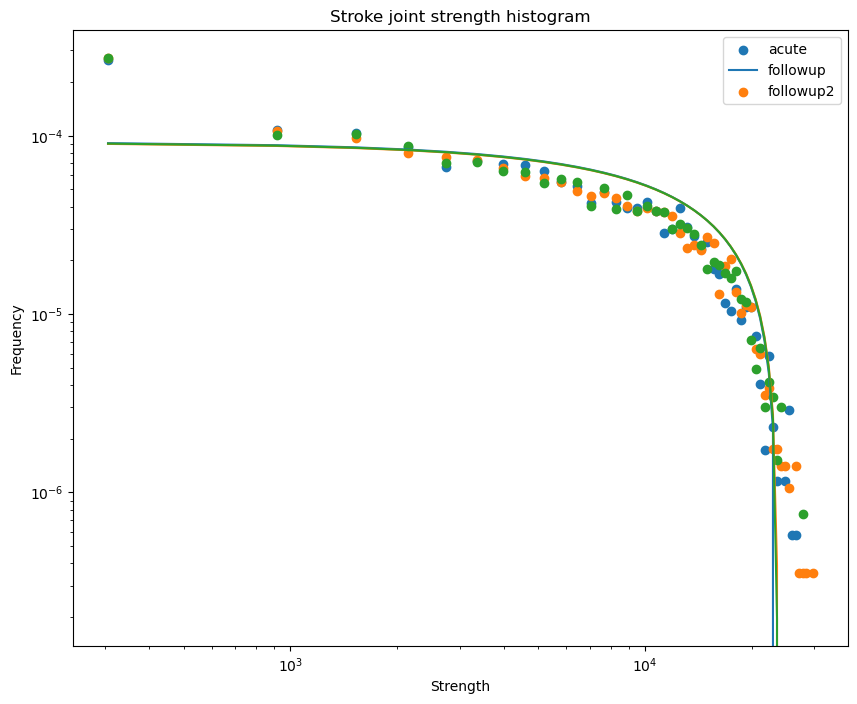

In [8]:
plt.figure(figsize=(10,8))
plt.title("Stroke joint strength histogram")
plt.xlabel("Strength")
plt.ylabel("Frequency")

bins_linear = np.linspace(0, 30000, 50)

for s in [strengths_stroke_acute_joint, strengths_stroke_followup_joint,
         strengths_stroke_followup2_joint]:
    #plt.hist(s, density=True, bins=bins, alpha=0.5)
    histCounts = np.histogram(s, bins=bins_linear, density=True)[0]
    binCenters = bins_linear[:-1] + np.diff(bins_linear) / 2
    
    plt.scatter(binCenters, histCounts)
    plt.plot(binCenters, odrout.beta[0] * binCenters + odrout.beta[1])



plt.legend(["acute", "followup", "followup2"])
plt.xscale("log")
plt.yscale("log")
plt.show()

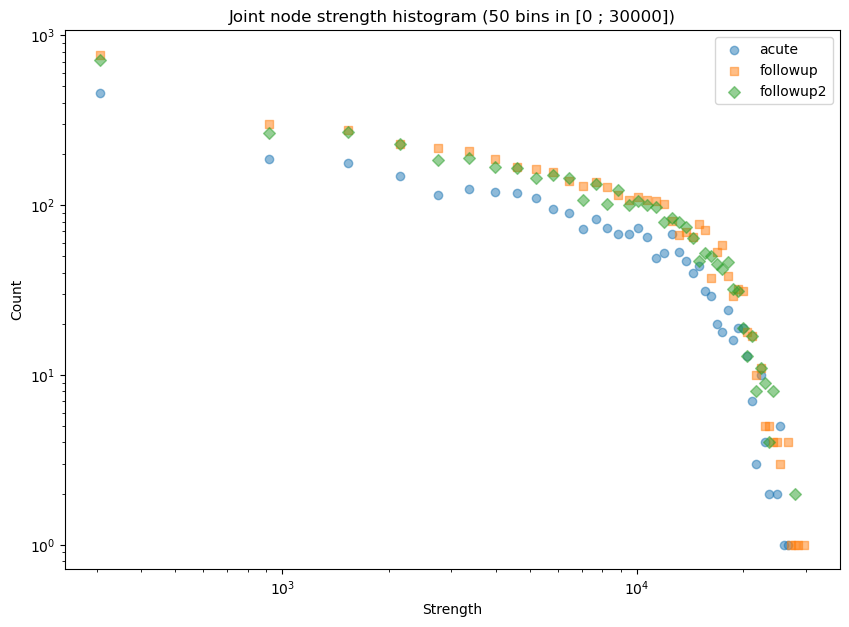

In [50]:
plt.figure(figsize=(10,7))
plt.title("Joint node strength histogram "
         f"({len(bins_linear)} bins "
         f"in [{bins_linear.min():.0f} ; {bins_linear.max():.0f}])")
plt.xlabel("Strength")
plt.ylabel("Count")
# plt.ylabel("Frequency") # uncomment if using density=True

bins_linear = np.linspace(0, 30000, 50)

for s, symb in zip([strengths_stroke_acute_joint, strengths_stroke_followup_joint,
         strengths_stroke_followup2_joint], ["o", "s", "D"]):
    #plt.hist(s, density=True, bins=bins, alpha=0.5)
    histCounts = np.histogram(s, bins=bins_linear, density=False)[0]
    binCenters = bins_linear[:-1] + np.diff(bins_linear) / 2
    
    plt.scatter(binCenters, histCounts, marker=symb, alpha=0.5)

plt.legend(["acute", "followup", "followup2"])
plt.xscale("log")
plt.yscale("log")
plt.show()

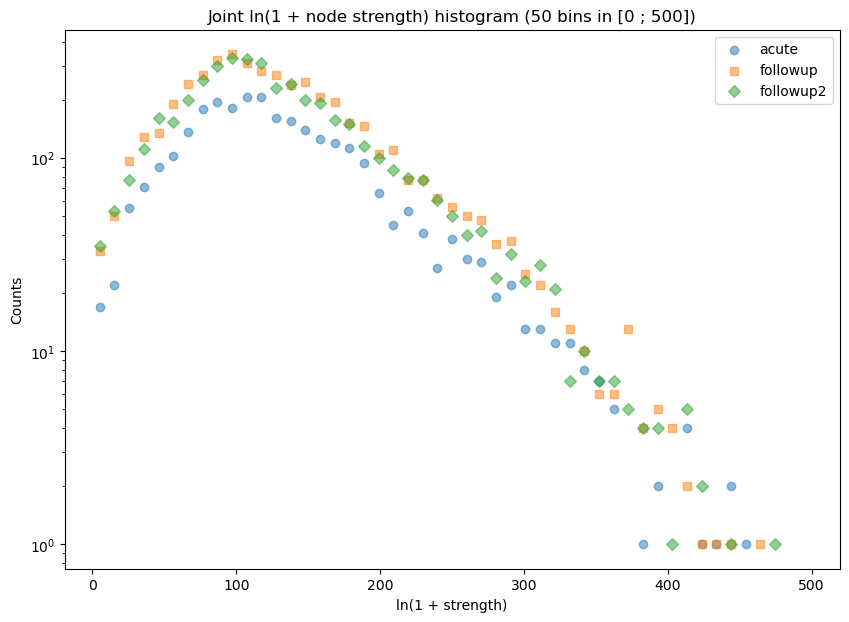

In [51]:
plt.figure(figsize=(10,7))
plt.title("Joint ln(1 + node strength) histogram "
         f"({len(bins_log1p)} bins "
         f"in [{bins_log1p.min():.0f} ; {bins_log1p.max():.0f}])")
plt.xlabel("ln(1 + strength)")
plt.ylabel("Counts")
# plt.ylabel("Frequency")

bins_log1p = np.linspace(0, 500, 50)

for s, symb in zip([strengths_stroke_acute_log1p_joint, strengths_stroke_followup_log1p_joint,
         strengths_stroke_followup2_log1p_joint], ["o", "s", "D"]):
    histCounts = np.histogram(s, bins=bins_log1p, density=False)[0]
    #plt.hist(s, density=True, bins=bins, alpha=0.5)
    binCenters = bins_log1p[:-1] + np.diff(bins_log1p) / 2
    plt.scatter(binCenters, histCounts, marker=symb, alpha=0.5)

plt.legend(["acute", "followup", "followup2"])
plt.yscale("log")
plt.show()

## Fitting lines to strength distributions

### Raw weights (not log1p'd)

[ 9.80152263  9.83485905  9.86711991  9.89837245  9.9286778   9.95809169
  9.98666506 10.01444462 10.0414733  10.0677906  10.09343303 10.11843434
 10.14282579 10.16663644 10.1898933  10.21262155 10.23484469 10.25658468
 10.27786207 10.29869616] 20
[3.21887582 2.83321334 2.99573227 2.99573227 2.63905733 2.07944154
 1.38629436 2.39789527 1.60943791 1.09861229 0.         1.09861229
 1.79175947 0.69314718 0.69314718 0.         0.         0.
 0.         0.        ] 20
Beta: [-8.26274376 84.57859708]
Beta Std Error: [0.78763871 7.93192251]
Beta Covariance: [[  177.97071607 -1792.08367016]
 [-1792.08367016 18048.92613518]]
Residual Variance: 0.003485824822766309
Inverse Condition #: 0.0012529095689500348
Reason(s) for Halting:
  Sum of squares convergence
[ 9.80152263  9.83485905  9.86711991  9.89837245  9.9286778   9.95809169
  9.98666506 10.01444462 10.0414733  10.0677906  10.09343303 10.11843434
 10.14282579 10.16663644 10.1898933  10.21262155 10.23484469 10.25658468
 10.27786207 10.298696

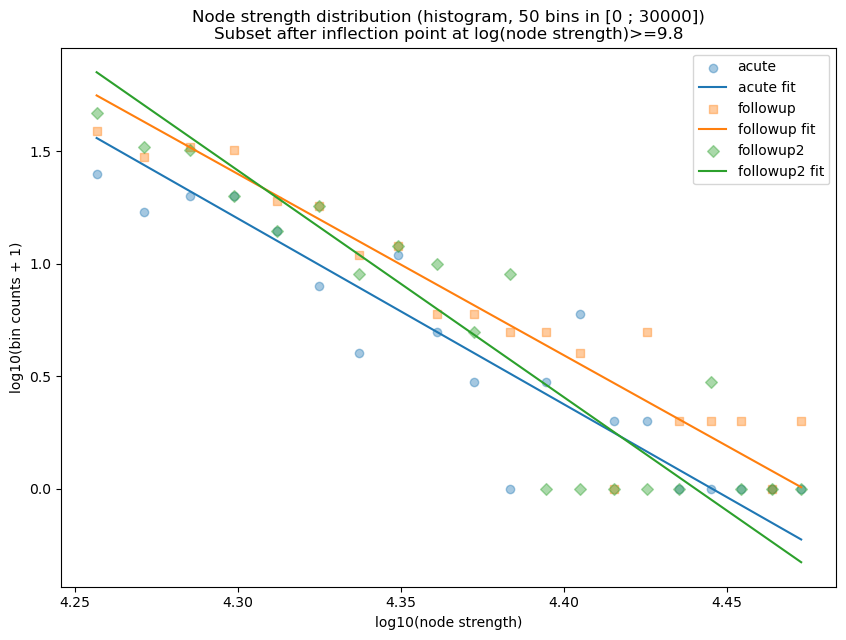

In [45]:
plt.figure(figsize=(10,7))
# plt.xlabel("ln(node strength)")
# plt.ylabel("ln(frequency + 1)")
plt.xlabel("log10(node strength)")
plt.ylabel("log10(bin counts + 1)")
plt.title(f"Node strength distribution (histogram, {len(bins_linear)} "
          f"bins in [{bins_linear.min():.0f} ; {bins_linear.max():.0f}])\n"
         "Subset after inflection point at log(node strength)>=9.8")

odr_results_counts = []

for s, scatterSymb in zip([strengths_stroke_acute_joint, strengths_stroke_followup_joint,
         strengths_stroke_followup2_joint], ["o", "s", "D"]):
    # Do log10 on all data before plotting and fitting.
    binCenters = np.log(bins_linear[:-1] + np.diff(bins_linear) / 2)
    histCounts = np.log1p(np.histogram(s, bins=bins_linear)[0])

    #plt.scatter(binCenters, histCounts)
    
    thresh_low = 9.8
    binCenters_odr = binCenters[binCenters >= thresh_low]
    print(binCenters_odr, len(binCenters_odr))
    histCounts_odr = histCounts[binCenters >= thresh_low]

    print(histCounts_odr, len(histCounts_odr))
    
    odrdat = odr.Data(binCenters_odr, histCounts_odr)
    odrobj = odr.ODR(odrdat, odr.unilinear)
    odrout = odrobj.run()
    odr_results_counts.append(odrout)
    odrout.pprint()
    
    plt.scatter(binCenters_odr / np.log(10), histCounts_odr / np.log(10), marker=scatterSymb, alpha=0.4)
    plt.plot(binCenters_odr / np.log(10), (odrout.beta[0] * binCenters_odr + odrout.beta[1]) / np.log(10))

        
plt.legend(["acute", "acute fit", "followup", "followup fit", "followup2", "followup2 fit"])
plt.show()

In [11]:
print(np.abs(odr_results_counts[0].beta[0] - odr_results_counts[1].beta[0]) / np.sqrt(odr_results_counts[0].sd_beta[0]**2 + odr_results_counts[1].sd_beta[0]**2))
print(np.abs(odr_results_counts[0].beta[0] - odr_results_counts[2].beta[0]) / np.sqrt(odr_results_counts[0].sd_beta[0]**2 + odr_results_counts[2].sd_beta[0]**2))
print(np.abs(odr_results_counts[1].beta[0] - odr_results_counts[2].beta[0]) / np.sqrt(odr_results_counts[1].sd_beta[0]**2 + odr_results_counts[2].sd_beta[0]**2))

0.19957293874993987
1.4652780942190489
1.7672819010179397


## Clustering coefficient analysis

In [12]:
def analyze_clustering_patNums(graphDict):
    clusterDict = dict()
    clusteringAvgDict = dict()
    for patNum, g in graphDict.items():
        clusterDict[patNum] = nx.clustering(g, weight="weight")
        clusteringAvgDict[patNum] = nx.average_clustering(g, weight="weight")
    
    return clusterDict, clusteringAvgDict

In [13]:
clustCoefs_patNums_stroke_acute, clusteringAvg_patNums_stroke_acute = analyze_clustering_patNums(Gs_stroke_acute)
clustCoefs_patNums_stroke_followup, clusteringAvg_patNums_stroke_followup = analyze_clustering_patNums(Gs_stroke_followup)
clustCoefs_patNums_stroke_followup2, clusteringAvg_patNums_stroke_followup2 = analyze_clustering_patNums(Gs_stroke_followup2)

KeyboardInterrupt: 

In [ ]:
clustCoefs_patNums_stroke_acute

In [81]:
clusteringAvg_patNums_stroke_acute_np = np.fromiter(clusteringAvg_patNums_stroke_acute.values(), dtype=float)
clusteringAvg_patNums_stroke_followup_np = np.fromiter(clusteringAvg_patNums_stroke_followup.values(), dtype=float)
clusteringAvg_patNums_stroke_followup2_np = np.fromiter(clusteringAvg_patNums_stroke_followup2.values(), dtype=float)

In [82]:
print(scipy.stats.describe(clusteringAvg_patNums_stroke_acute_np))
print(scipy.stats.describe(clusteringAvg_patNums_stroke_followup_np))
print(scipy.stats.describe(clusteringAvg_patNums_stroke_followup2_np))

DescribeResult(nobs=17, minmax=(0.0027782181190541973, 0.006135117958189849), mean=0.004171279368378793, variance=1.0165363522414093e-06, skewness=0.5477261409958883, kurtosis=-0.5195070711450183)
DescribeResult(nobs=28, minmax=(0.002538476187023814, 0.006347961612733156), mean=0.004321107931565813, variance=1.0677628184922998e-06, skewness=0.40429213251766205, kurtosis=-0.7239577219800766)
DescribeResult(nobs=26, minmax=(0.002669393482503841, 0.006411613023059067), mean=0.004520426614261622, variance=1.4274872600776827e-06, skewness=-0.25325521182486754, kurtosis=-1.1717238906351612)


In [83]:
def compare_array_means(a1, a2, verbose=False):
    meanDiffQuotVariances = np.abs(a1.mean()-a2.mean()) / np.sqrt(np.var(a1) + np.var(a2))
    
    return meanDiffQuotVariances


print("quotient, acute vs followup:", compare_array_means(clusteringAvg_patNums_stroke_acute_np, clusteringAvg_patNums_stroke_followup_np))
print("quotient, acute vs followup2:", compare_array_means(clusteringAvg_patNums_stroke_acute_np, clusteringAvg_patNums_stroke_followup2_np))
print("quotient, followup vs followup2:", compare_array_means(clusteringAvg_patNums_stroke_followup_np, clusteringAvg_patNums_stroke_followup2_np))

quotient, acute vs followup: 0.10630769504621271
quotient, acute vs followup2: 0.2287671542962316
quotient, followup vs followup2: 0.12860039774491422


### T-tests for average clustering coefficients

In [87]:
clusteringAvg_patNums_stroke_acute_np

array([0.00478684, 0.00311031, 0.00591512, 0.00395208, 0.00283038,
       0.00312451, 0.00613512, 0.00384746, 0.00448792, 0.00455079,
       0.00277822, 0.00564644, 0.00366649, 0.00408029, 0.00396743,
       0.00424194, 0.00379043])

In [89]:
print("T-test, acute vs followup: ", scipy.stats.ttest_ind(clusteringAvg_patNums_stroke_acute_np, clusteringAvg_patNums_stroke_followup_np, equal_var=False))
print("T-test, acute vs followup2: ", scipy.stats.ttest_ind(clusteringAvg_patNums_stroke_acute_np, clusteringAvg_patNums_stroke_followup2_np, equal_var=False))
print("T-test, followup vs followup2: ", scipy.stats.ttest_ind(clusteringAvg_patNums_stroke_followup_np, clusteringAvg_patNums_stroke_followup2_np, equal_var=False))

T-test, acute vs followup:  Ttest_indResult(statistic=-0.4787792423163451, pvalue=0.6351092612712561)
T-test, acute vs followup2:  Ttest_indResult(statistic=-1.0309263636924313, pvalue=0.3090521793025139)
T-test, followup vs followup2:  Ttest_indResult(statistic=-0.6534591239240144, pvalue=0.5164769349843528)


In [94]:
print(np.mean(clusteringAvg_patNums_stroke_followup_np))
print(np.std(clusteringAvg_patNums_stroke_followup_np))

0.004321107931565813
0.0010147060816401835


## Small world summary metrics ($\sigma$)

In [102]:
def analyze_smallworldness_patNums(graphDict):
    sigmaDict = dict()
    for patNum, g in graphDict.items():
        sigmaDict[patNum] = nx.sigma(g)
        print("Finished for patient PAT", patNum)
    
    return sigmaDict

In [103]:
# Don't run - will not finish in any reasonable time
#sigmas_stroke_acute = analyze_smallworldness_patNums(Gs_stroke_acute)

## Global and local efficiency, modularity

- Global efficiency
- Local efficiency
- Modularity (from Louvain algorithm communities)

In [15]:
# Based on main.py

def calc_communstats(graphDict, verbose=False):
    eff_local_dict = dict()
    eff_global_dict = dict()
    modularity_dict = dict()
    
    for patNum, g in graphDict.items():
        eff_local_dict[patNum] = nx.local_efficiency(g)
        eff_global_dict[patNum] = nx.global_efficiency(g)
        
        commun = nx.algorithms.community.louvain_communities(g, weight="weight")
        modularity_dict[patNum] = nx.algorithms.community.modularity(g, commun, weight="weight")
        
        if verbose:
            print("Done for patient PAT", patNum)
    
    return eff_local_dict, eff_global_dict, modularity_dict


### Precalculated data

In [22]:
eff_local_acute =  {134: 0.8183721852234381, 145: 0.8428801728865125, 148: 0.8082701271807783, 151: 0.8172799003531426, 154: 0.8387751701133428, 155: 0.8391394230438635, 161: 0.8187589027263967, 162: 0.8257148731241661, 167: 0.8263781317424855, 168: 0.8107237361536366, 175: 0.8537542452149574, 177: 0.8268951009161887, 187: 0.8176775030735611, 190: 0.8177201294565669, 191: 0.8242507658381801, 194: 0.8001314387733139, 196: 0.834431479312452}
eff_global_acute =  {134: 0.6257271510283663, 145: 0.7324327613484239, 148: 0.5729645856152256, 151: 0.6387002555677344, 154: 0.6932213703298049, 155: 0.670469757819156, 161: 0.6182061579652074, 162: 0.6619447486917406, 167: 0.6507484483388226, 168: 0.6137641474991063, 175: 0.714287452841671, 177: 0.6439333089935607, 187: 0.6498235365705324, 190: 0.6528173299257711, 191: 0.6455944992089689, 194: 0.589022757697487, 196: 0.6941949616648436}
modularity_acute =  {134: 0.6471747920787544, 145: 0.5864589546369622, 148: 0.6755506718490276, 151: 0.640023563856242, 154: 0.6166960550467329, 155: 0.6294089596288812, 161: 0.6622898272128567, 162: 0.6247488613248391, 167: 0.654584606281034, 168: 0.6653582272631573, 175: 0.5830085644902259, 177: 0.6533235638591304, 187: 0.6517335375596196, 190: 0.6235891201882469, 191: 0.64562774303617, 194: 0.6671746836101905, 196: 0.6356680845041638}

eff_local_followup =  {134: 0.8076544280654695, 145: 0.8424657467651788, 148: 0.8084446205963606, 151: 0.8237351429577074, 155: 0.8376009546461629, 161: 0.8293908306479343, 162: 0.8255311752082255, 167: 0.8270944894951574, 168: 0.8147570682296958, 175: 0.842017497885057, 177: 0.8369717063747328, 51: 0.8352819984262629, 52: 0.8239145942077992, 187: 0.8328556620698142, 190: 0.8267460973728066, 196: 0.8380891167566112, 72: 0.8173003452042696, 75: 0.8339634351419578, 78: 0.8232558465623872, 80: 0.8312510407062903, 84: 0.845256955901823, 98: 0.8249419891732657, 99: 0.8331133612739609, 100: 0.838392219079083, 107: 0.816933177659194, 109: 0.83933306109117, 116: 0.8326697735896984, 124: 0.842749139111115}
eff_global_followup =  {134: 0.6310210539126276, 145: 0.7296093464768166, 148: 0.567043933309027, 151: 0.6352318364366673, 155: 0.6432274552756609, 161: 0.6901667275161276, 162: 0.6303882195448581, 167: 0.6434100036509759, 168: 0.5957953024218307, 175: 0.6606790799562037, 177: 0.6427163198247686, 51: 0.6417670682730978, 52: 0.5688511622247022, 187: 0.6813192162589781, 190: 0.6614944626992878, 196: 0.7069490081538289, 72: 0.5419313618109385, 75: 0.6636972130948096, 78: 0.5915297553852259, 80: 0.6859437751004034, 84: 0.7173786053304123, 98: 0.6436777412681066, 99: 0.6643178775708944, 100: 0.6881708652793008, 107: 0.6350371181696638, 109: 0.6818181818181864, 116: 0.6984422538639422, 124: 0.6672995010344497}
modularity_followup =  {134: 0.664209066135999, 145: 0.5917383325073786, 148: 0.6861487754012483, 151: 0.6141770794445949, 155: 0.6491016835644992, 161: 0.6470595687467393, 162: 0.6382207947911496, 167: 0.6556886466464407, 168: 0.6727292927827263, 175: 0.6070319701062699, 177: 0.6597869856383609, 51: 0.6540443300097922, 52: 0.6801538936287657, 187: 0.6545322514360485, 190: 0.6385932623081965, 196: 0.6341202379526716, 72: 0.7074959373350582, 75: 0.6543310046845684, 78: 0.6589196602979006, 80: 0.6137724179714467, 84: 0.6266277346584705, 98: 0.6509761604634468, 99: 0.6554579875661442, 100: 0.6236719085802067, 107: 0.6316765161721786, 109: 0.6201849065643414, 116: 0.6504450622861838, 124: 0.62390197612833}

eff_local_followup2 =  {145: 0.8444244504839374, 148: 0.8101463561606551, 151: 0.826932330198162, 155: 0.8412293585251184, 161: 0.8258416644989801, 162: 0.8225777999206921, 35: 0.8122550346865431, 168: 0.8097549068055063, 43: 0.8332416321520816, 44: 0.8304400221149644, 175: 0.8362205802342437, 47: 0.8290355791585085, 177: 0.8308311403188059, 51: 0.82330988396771, 52: 0.8303897147359638, 187: 0.8305476711854904, 190: 0.8239859777116383, 62: 0.8264085862839424, 78: 0.8283230926939681, 81: 0.8344714780737289, 84: 0.8493104601835801, 87: 0.831487018439874, 93: 0.8276076065262918, 100: 0.8338221397391432, 109: 0.8343601455119136, 124: 0.8373866485272077}
eff_global_followup2 =  {145: 0.735852500912742, 148: 0.5369076305221325, 151: 0.6259096994036913, 155: 0.6735852500912777, 161: 0.6723743458683242, 162: 0.6351162224656205, 35: 0.5847328708774837, 168: 0.6003894365340384, 43: 0.625751490811753, 44: 0.6020749665328409, 175: 0.709395156383108, 47: 0.60636485335283, 177: 0.6685895095533726, 51: 0.633242059145689, 52: 0.6244979919678886, 187: 0.6851040525739337, 190: 0.6536448825605529, 62: 0.6304855786783679, 78: 0.6353535353535491, 81: 0.6770962638432565, 84: 0.7174151150054767, 87: 0.6624619690884824, 93: 0.6348180601192807, 100: 0.6834489473043723, 109: 0.6771449434100085, 124: 0.6792381647803379}
modularity_followup2 =  {145: 0.6025711802683293, 148: 0.6905516724750631, 151: 0.6295015202921475, 155: 0.6388618301948661, 161: 0.6479517048302045, 162: 0.6602675874792442, 35: 0.6788532206949099, 168: 0.6659611274796602, 43: 0.6708567970038752, 44: 0.6480000481468972, 175: 0.5844959936299431, 47: 0.6610097445401899, 177: 0.6500170912650828, 51: 0.674601366106439, 52: 0.63117920793836, 187: 0.6403797258525332, 190: 0.6291535649514011, 62: 0.6613586532838069, 78: 0.6566185045424269, 81: 0.6503925727353644, 84: 0.6127869050807605, 87: 0.6438023800384007, 93: 0.6532610720854708, 100: 0.6208010514236089, 109: 0.5956173411626944, 124: 0.6256729608235428}


In [17]:
eff_local_acute, eff_global_acute, modularity_acute = calc_communstats(Gs_stroke_acute, True)

Done for patient PAT 134
Done for patient PAT 145
Done for patient PAT 148
Done for patient PAT 151
Done for patient PAT 154
Done for patient PAT 155
Done for patient PAT 161
Done for patient PAT 162
Done for patient PAT 167
Done for patient PAT 168
Done for patient PAT 175
Done for patient PAT 177
Done for patient PAT 187
Done for patient PAT 190
Done for patient PAT 191
Done for patient PAT 194
Done for patient PAT 196


In [ ]:
eff_local_followup, eff_global_followup, modularity_followup = calc_communstats(Gs_stroke_followup, True)

In [ ]:
eff_local_followup2, eff_global_followup2, modularity_followup2 = calc_communstats(Gs_stroke_followup2, True)

### Descriptive statistics for efficiencies, modularites

In [32]:
print("Descriptive stats, eff_global_acute:", scipy.stats.describe(list(eff_global_acute.values())))
print("Descriptive stats, eff_global_followup:", scipy.stats.describe(list(eff_global_followup.values())))
print("Descriptive stats, eff_global_followup2:", scipy.stats.describe(list(eff_global_followup2.values())))

Descriptive stats, eff_global_acute: DescribeResult(nobs=17, minmax=(0.5729645856152256, 0.7324327613484239), mean=0.6510501900650837, variance=0.001753151172083051, skewness=0.11861071930578287, kurtosis=-0.3607183703534407)
Descriptive stats, eff_global_followup: DescribeResult(nobs=28, minmax=(0.5419313618109385, 0.7296093464768166), mean=0.6503183730593497, variance=0.0020999151016309696, skewness=-0.568883244246457, kurtosis=-0.0819109039964836)
Descriptive stats, eff_global_followup2: DescribeResult(nobs=26, minmax=(0.5369076305221325, 0.735852500912742), mean=0.648884442197708, variance=0.0019407019989779541, skewness=-0.29448655044852434, kurtosis=0.17838438670288337)


In [33]:
print("Descriptive stats, eff_local_acute:", scipy.stats.describe(list(eff_local_acute.values())))
print("Descriptive stats, eff_local_followup:", scipy.stats.describe(list(eff_local_followup.values())))
print("Descriptive stats, eff_local_followup2:", scipy.stats.describe(list(eff_local_followup2.values())))

Descriptive stats, eff_local_acute: DescribeResult(nobs=17, minmax=(0.8001314387733139, 0.8537542452149574), mean=0.8247737226548814, variance=0.000186379472115381, skewness=0.33064775383773065, kurtosis=-0.3319560476619343)
Descriptive stats, eff_local_followup: DescribeResult(nobs=28, minmax=(0.8076544280654695, 0.845256955901823), mean=0.8297039812213998, variance=0.00010397119114850752, skewness=-0.5430530762899899, kurtosis=-0.4758823193685586)
Descriptive stats, eff_local_followup2: DescribeResult(nobs=26, minmax=(0.8097549068055063, 0.8493104601835801), mean=0.8293977414937943, variance=8.65020129089231e-05, skewness=-0.3225861086854375, kurtosis=0.40923489648951117)


In [34]:
print("Descriptive stats, modularity_acute:", scipy.stats.describe(list(modularity_acute.values())))
print("Descriptive stats, modularity_followup:", scipy.stats.describe(list(modularity_followup.values())))
print("Descriptive stats, modularity_followup2:", scipy.stats.describe(list(modularity_followup2.values())))

Descriptive stats, modularity_acute: DescribeResult(nobs=17, minmax=(0.5830085644902259, 0.6755506718490276), mean=0.6389658715544845, variance=0.0006891033905743823, skewness=-0.8057639538579151, kurtosis=-0.04966562225553295)
Descriptive stats, modularity_followup: DescribeResult(nobs=28, minmax=(0.5917383325073786, 0.7074959373350582), mean=0.6451713372788984, variance=0.0006442167070114766, skewness=0.178720825178923, kurtosis=0.08945423074257342)
Descriptive stats, modularity_followup2: DescribeResult(nobs=26, minmax=(0.5844959936299431, 0.6905516724750631), mean=0.6432509547817393, variance=0.0006718814040142375, skewness=-0.45733846455859223, kurtosis=-0.24690863047745903)


### T-tests for global and local efficiencies, modularity

In [36]:
print("T-test (acute, followup), global efficiency:", scipy.stats.ttest_ind(list(eff_global_acute.values()), list(eff_global_followup.values()), equal_var=False))
print("T-test (acute, followup2), global efficiency:", scipy.stats.ttest_ind(list(eff_global_acute.values()), list(eff_global_followup2.values()), equal_var=False))
print("T-test (followup, followup2), global efficiency:", scipy.stats.ttest_ind(list(eff_global_followup.values()), list(eff_global_followup2.values()), equal_var=False))

T-test (acute, followup), global efficiency: Ttest_indResult(statistic=0.0548329836691396, pvalue=0.9565718528631963)
T-test (acute, followup2), global efficiency: Ttest_indResult(statistic=0.16243513489101502, pvalue=0.8718815688886683)
T-test (followup, followup2), global efficiency: Ttest_indResult(statistic=0.1172209675529926, pvalue=0.9071371303860664)


In [37]:
print("T-test (acute, followup), local efficiency:", scipy.stats.ttest_ind(list(eff_local_acute.values()), list(eff_local_followup.values()), equal_var=False))
print("T-test (acute, followup2), local efficiency:", scipy.stats.ttest_ind(list(eff_local_acute.values()), list(eff_local_followup2.values()), equal_var=False))
print("T-test (followup, followup2), local efficiency:", scipy.stats.ttest_ind(list(eff_local_followup.values()), list(eff_local_followup2.values()), equal_var=False))

T-test (acute, followup), local efficiency: Ttest_indResult(statistic=-1.286929248386415, pvalue=0.2091043619786615)
T-test (acute, followup2), local efficiency: Ttest_indResult(statistic=-1.2231955714010914, pvalue=0.23236607257958708)
T-test (followup, followup2), local efficiency: Ttest_indResult(statistic=0.11541633073559397, pvalue=0.9085598030392368)


In [38]:
print("T-test (acute, followup), modularity:", scipy.stats.ttest_ind(list(modularity_acute.values()), list(modularity_followup.values()), equal_var=False))
print("T-test (acute, followup2), modularity:", scipy.stats.ttest_ind(list(modularity_acute.values()), list(modularity_followup2.values()), equal_var=False))
print("T-test (followup, followup2), modularity:", scipy.stats.ttest_ind(list(modularity_followup.values()), list(modularity_followup2.values()), equal_var=False))

T-test (acute, followup), modularity: Ttest_indResult(statistic=-0.7784661395966294, pvalue=0.44183818839171973)
T-test (acute, followup2), modularity: Ttest_indResult(statistic=-0.5259569158228612, pvalue=0.6023275183974032)
T-test (followup, followup2), modularity: Ttest_indResult(statistic=0.2747631106258384, pvalue=0.7845970905812354)
